In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing latest version of our DataFrame

In [2]:
# dti = pd.date_range(pd.Timestamp(pd.to_datetime('today').date()), periods=92*24, freq='0.5H')
# df = pd.DataFrame(index=dti)
# df['Date'] = df.index
# df.to_csv('df_init' , index=False)
# df = pd.read_csv('df_init')
# df['Date'] = list(map(pd.Timestamp , df['Date']))
# df.set_index('Date' , inplace=True)
# df.columns = pd.MultiIndex.from_tuples(df.columns)

df = pd.read_csv('df_commit')
df.set_index(['Unnamed: 0','Unnamed: 1'],  inplace=True)
df = df.T
df.index = list(map(pd.Timestamp , df.index))

# Creating tasks


In [3]:
num_days = 6

# Updating tasks each day for a whole week

In [4]:
def update_todays_tasks(df ):
    kind = input('please specify whether your task is a Habbit or Project:')
    while kind != 'Habit' and kind != 'Project':
        print('{} is not an option.'.format(kind))
        kind = input('please specify whether your task is a Habbit or Project:')
    
    task = input('please enter Topic of your {}'.format(kind))
    if (kind+'s' , task) not in df.columns:
        df[(kind+'s',task)] = np.zeros(len(df))
        df.columns = pd.MultiIndex.from_tuples(df.columns)
    
#     task = input('Which habbit you would like to update')
    start_of_task = input('When did you start '+task+'? (template: 01:30)') + ':00'
    stop_of_task = input('When did you end '+task+'? (template: 01:30)') + ':00'
    
    start_timestamp = pd.Timestamp(str(pd.Timestamp.today()+pd.Timedelta(str(num_days)+'D'))[:10]+' ' + start_of_task)
    stop_timestamp  = pd.Timestamp(str(pd.Timestamp.today()+pd.Timedelta(str(num_days)+'D'))[:10]+' ' + stop_of_task)
    
    df[(kind+'s',task)][start_timestamp:stop_timestamp - pd.Timedelta(hours=0.5)] = 1
    
#     df[('G','Date')] = df.index
#     df.to_csv('df_init' , index=False)
#     df.drop(('G','Date'))
    
    return df

In [5]:
df = update_todays_tasks(df )

please specify whether your task is a Habbit or Project: Habit
please enter Topic of your Habit Sleep
When did you start Sleep? (template: 01:30) 04:00
When did you end Sleep? (template: 01:30) 12:00


In [6]:
df = update_todays_tasks(df )

please specify whether your task is a Habbit or Project: Habit
please enter Topic of your Habit Lunch
When did you start Lunch? (template: 01:30) 13:00
When did you end Lunch? (template: 01:30) 14:00


In [7]:
df = update_todays_tasks(df )

please specify whether your task is a Habbit or Project: Project
please enter Topic of your Project Coding
When did you start Coding? (template: 01:30) 15:00
When did you end Coding? (template: 01:30) 16:00


In [8]:
df = update_todays_tasks(df )

please specify whether your task is a Habbit or Project: English


English is not an option.


please specify whether your task is a Habbit or Project: 16:30


16:30 is not an option.


please specify whether your task is a Habbit or Project: 17:00


17:00 is not an option.


please specify whether your task is a Habbit or Project: Project
please enter Topic of your Project English
When did you start English? (template: 01:30) 16:30
When did you end English? (template: 01:30) 17:00


In [9]:
df.T.to_csv('df_commit')

In [5]:
completed_df = df.resample('24H').sum()/2
completed_df = completed_df[(completed_df.T !=0).any()]

In [6]:
completed_df

Unnamed: 0 Habits       Projects       
Unnamed: 1  Sleep Lunch  English Coding
2020-06-01    8.0   1.0      1.0    9.0
2020-06-02    9.0   2.0      3.0    3.0
2020-06-03   10.5   3.0      2.0    7.0
2020-06-04    7.5   3.0      3.0    4.0
2020-06-05    8.0   2.0      1.0    7.0
2020-06-06    5.0   2.0      1.0    2.0
2020-06-07    8.0   1.0      0.5    1.0

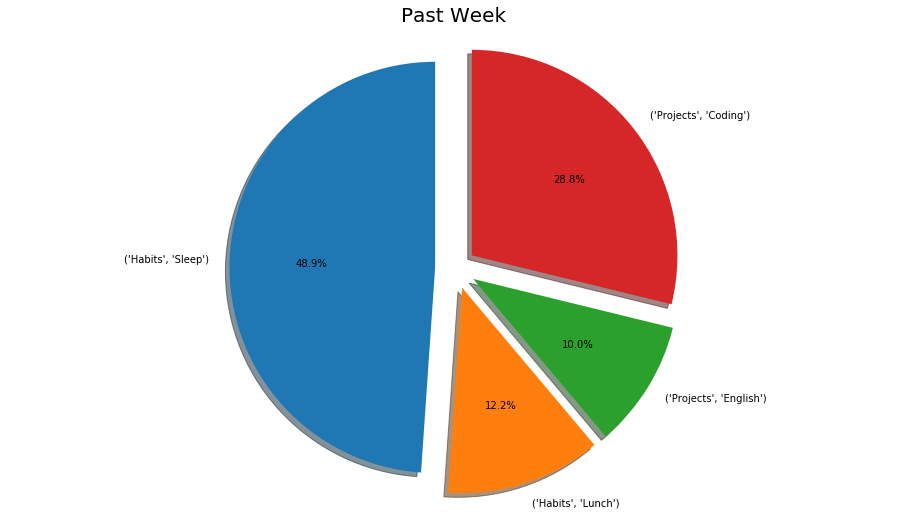

In [20]:
vals = completed_df.sum().values
this_week = [i/sum(vals) for i in vals]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.columns
sizes = this_week
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Past Week' , fontsize=20)
plt.show()

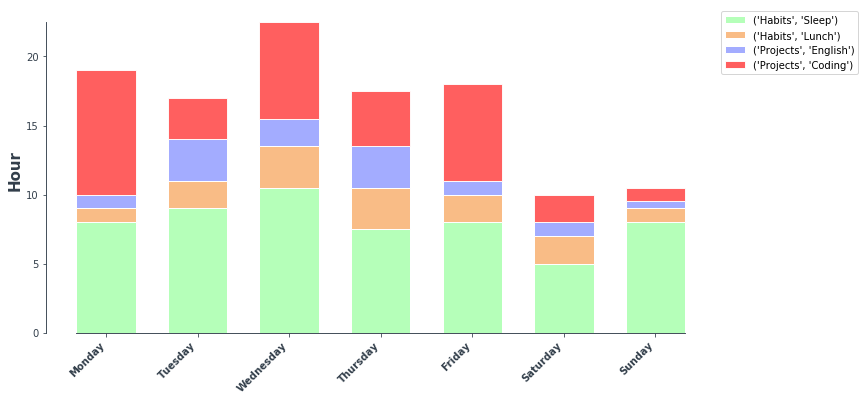

In [24]:
def get_day_nameHn(inp, fre='24H'):
    return pd.Timestamp(inp, freq=fre).day_name()

from matplotlib import rc
fig, ax = plt.subplots(figsize=(12,6))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

r = [0,1,2,3,4,5,6]
df = completed_df
barWidth = 0.65
names = list(map(get_day_nameHn , completed_df.index))
# Create green Bars
plt.bar(r, df[df.columns[0]], color='#b5ffb9', edgecolor='white', width=barWidth ,  label=df.columns[0])
plt.bar(r, df[df.columns[1]], bottom=df[df.columns[0]], color='#f9bc86', edgecolor='white', width=barWidth , label=df.columns[1])
plt.bar(r, df[df.columns[2]], bottom=[i+j for i,j in zip(df[df.columns[0]], df[df.columns[1]])], color='#a3acff', edgecolor='white', width=barWidth, label=df.columns[2])
plt.bar(r, df[df.columns[3]], bottom=[i+j+k for i,j,k in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]])], color='#ff4d4d', edgecolor='white', width=barWidth , alpha=0.9 ,  label=df.columns[3])
# plt.bar(r, df[df.columns[4]], bottom=[i+j+k+l for i,j,k,l in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]])], color='greenyellow', edgecolor='white', width=barWidth , label=df.columns[4])
# plt.bar(r, df[df.columns[5]], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]])], color='lightcoral', edgecolor='white', width=barWidth ,label=df.columns[5] )   
# plt.bar(r, df[df.columns[6]], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]])], color='grey', edgecolor='white', width=barWidth ,label=df.columns[6])
# plt.bar(r, df[df.columns[7]], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]] , df[df.columns[6]])], color='blueviolet', edgecolor='white', width=barWidth ,alpha=.9 , label=df.columns[7]) 

# Custom x axis
plt.xticks(r, names , fontsize=10, fontweight='black', color = '#333F4B')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Hour' , fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# plt.savefig('fig2.png', dpi=300, bbox_inches='tight', transparent = True)
plt.show()

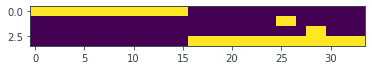

In [43]:
detailed_df = df[(df.T !=0).any()]
plt.imshow(detailed_df.iloc[:34].T.values)

Unnamed: 0          Habits       Projects       
Unnamed: 1           Sleep Lunch  English Coding
2020-06-01 03:00:00    1.0   0.0      0.0    0.0
2020-06-01 03:30:00    1.0   0.0      0.0    0.0
2020-06-01 04:00:00    1.0   0.0      0.0    0.0
2020-06-01 04:30:00    1.0   0.0      0.0    0.0
2020-06-01 05:00:00    1.0   0.0      0.0    0.0
...                    ...   ...      ...    ...
2020-06-07 13:00:00    0.0   1.0      0.0    0.0
2020-06-07 13:30:00    0.0   1.0      0.0    0.0
2020-06-07 15:00:00    0.0   0.0      0.0    1.0
2020-06-07 15:30:00    0.0   0.0      0.0    1.0
2020-06-07 16:30:00    0.0   0.0      1.0    0.0

[221 rows x 4 columns]

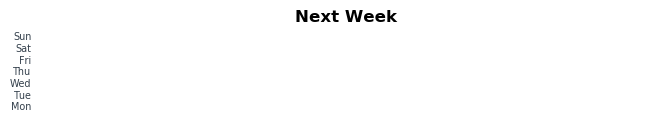

In [36]:

fig = plt.figure(figsize=(8,4.5), dpi=100)
X = np.linspace(-1,1, 53*7)

ax = plt.subplot(311, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="x-small", which='major')

# Month borders
xticks, labels = [], []


ax.set_xticks(xticks)
ax.set_xticklabels(labels)
ax.set_yticks(0.5 + np.arange(7))
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_title("Next Week", weight="semibold")

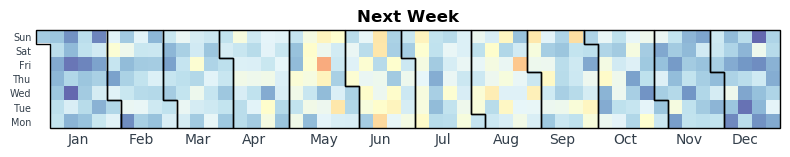

In [29]:
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta 

def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("Next Week", weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu", origin="lower", alpha=.75)


fig = plt.figure(figsize=(8,4.5), dpi=100)
X = np.linspace(-1,1, 53*7)

ax = plt.subplot(311, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
calmap(ax, 2017, I.reshape(53,7).T)


plt.tight_layout()
# plt.savefig("calendar-heatmap.png", dpi=300)
# plt.savefig("calendar-heatmap.pdf", dpi=600)
plt.show()

In [28]:
datetime(2020,1,1).weekday()

2